<a href="https://colab.research.google.com/github/MANICKAVIGNESH/Mortgage_Trading_Analysis_and_Prediction/blob/main/(Mutual_Information_Selection_%26_FEATURE_ENGINEERING_)_Mortgage_Trading_Analysis_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Company Project/Technocolab software Pvt Ltd/Main Project - Mortgage Trading Analysis and Prediction/CSV FILE/LoanExport.csv')

<ipython-input-136-76417fd182c8>:1: DtypeWarning:

Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291451 entries, 0 to 291450
Data columns (total 61 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   CreditScore               291451 non-null  int64  
 1   FirstPaymentDate          291451 non-null  int64  
 2   FirstTimeHomebuyer        291451 non-null  object 
 3   MaturityDate              291451 non-null  int64  
 4   MSA                       291451 non-null  object 
 5   MIP                       291451 non-null  int64  
 6   Units                     291451 non-null  int64  
 7   Occupancy                 291451 non-null  object 
 8   OCLTV                     291451 non-null  int64  
 9   DTI                       291451 non-null  int64  
 10  OrigUPB                   291451 non-null  int64  
 11  LTV                       291451 non-null  int64  
 12  OrigInterestRate          291451 non-null  float64
 13  Channel                   291451 non-null  o

In [ ]:
# Identify columns that start with 'ServicerName_'
servicer_name_columns = [col for col in df.columns if col.startswith('ServicerName_')]

# Combine the lists
required_columns = servicer_name_columns

# Print the required columns
print(required_columns)

['ServicerName_ABNAMROMTGEGROUPINC', 'ServicerName_BAMORTGAGELLC      ', 'ServicerName_BANKOFAMERICANA    ', 'ServicerName_CHASEHOMEFINANCELLC ', 'ServicerName_CHASEMANHATTANMTGECO', 'ServicerName_CHASEMTGECO         ', 'ServicerName_CITIMORTGAGEINC    ', 'ServicerName_COUNTRYWIDE         ', 'ServicerName_FIFTHTHIRDBANK      ', 'ServicerName_FTMTGESERVICESINC  ', 'ServicerName_GMACMTGECORP        ', 'ServicerName_HOMESIDELENDINGINC ', 'ServicerName_JPMORGANCHASEBANKNA', 'ServicerName_NATLCITYMTGECO      ', 'ServicerName_Other servicers     ', 'ServicerName_PRINCIPALRESIDENTIAL', 'ServicerName_SUNTRUSTMORTGAGEINC', 'ServicerName_WASHINGTONMUTUALBANK', 'ServicerName_WELLSFARGOBANKNA   ', 'ServicerName_WELLSFARGOHOMEMORTGA']


In [ ]:
# Check the unique values in loan_purpose column
print(df['ServicerName'].unique())

# Check the unique values in loan_purpose column and their counts
loan_purpose_counts = df['ServicerName'].value_counts()

print("\nCounts of each unique value:")
print(loan_purpose_counts)#'RemainingTermRatio','first_time_buyer','repay_range','Credit_range','LTV_range'

['WASHINGTONMUTUALBANK' 'CHASEHOMEFINANCELLC ' 'GMACMTGECORP        '
 'Other servicers     ' 'WELLSFARGOBANKNA   ' 'ABNAMROMTGEGROUPINC'
 'BANKOFAMERICANA    ' 'CHASEMANHATTANMTGECO' 'HOMESIDELENDINGINC '
 'CHASEMTGECO         ' 'WELLSFARGOHOMEMORTGA' 'PRINCIPALRESIDENTIAL'
 'CITIMORTGAGEINC    ' 'JPMORGANCHASEBANKNA' 'BAMORTGAGELLC      '
 'NATLCITYMTGECO      ' 'FTMTGESERVICESINC  ' 'SUNTRUSTMORTGAGEINC'
 'COUNTRYWIDE         ' 'FIFTHTHIRDBANK      ']

Counts of each unique value:
ServicerName
Other servicers         64043
COUNTRYWIDE             31142
BANKOFAMERICANA         29481
WASHINGTONMUTUALBANK    22626
CHASEMANHATTANMTGECO    14791
ABNAMROMTGEGROUPINC     14369
WELLSFARGOHOMEMORTGA    13960
GMACMTGECORP            11560
BAMORTGAGELLC           11559
CHASEMTGECO             10109
NATLCITYMTGECO           9940
WELLSFARGOBANKNA         9460
JPMORGANCHASEBANKNA      7723
FTMTGESERVICESINC        7126
SUNTRUSTMORTGAGEINC      6680
CITIMORTGAGEINC          6529
PRINCIPALRESIDENTI

In [ ]:
# Function to replace CreditScore values
def map_credit_score(score):
    if score <= 620:
        return 1
    elif 620 < score <= 700:
        return 2
    elif 700 < score <= 750:
        return 3
    elif 750 < score <= 900:
        return 3
    else:
        return None  # or handle the case if score is outside 0-900 range

# Apply the function to the CreditScore column and store in a new column Credit_range
df['Credit_range'] = df['CreditScore'].apply(map_credit_score)

In [ ]:
# Function to replace CreditScore values
def map_credit_score(score):
    if score <= 25:
        return 0
    elif 25 < score <= 50:
        return 1
    elif 50 < score <= 100:
        return 2
    else:
        return 3  # or handle the case if score is outside 0-900 range

# Apply the function to the CreditScore column and store in a new column Credit_range
df['LTV_range'] = df['LTV'].apply(map_credit_score)

In [ ]:
# Function to replace CreditScore values
def map_credit_score(score):
    if score <= 48:
        return 0
    elif 48 < score <= 96:
        return 1
    elif 96 < score <= 144:
        return 2
    elif 144 < score <= 192:
        return 3
    elif 192 < score <= 240:
        return 4
    else:
        return 5  # or handle the case if score is outside 0-900 range

# Apply the function to the CreditScore column and store in a new column Credit_range
df['repay_range'] = df['MonthsInRepayment'].apply(map_credit_score)

In [ ]:
# Function to convert LoanSeqNum string to integer
def convert_loanseqnum_to_int(loan_seq_num):
    int_value = [char for char in loan_seq_num if char.isdigit()]
    str_int = ''.join(int_value)
    return int(str_int)

# Apply the function to the LoanSeqNum column and create a new column loanid
df['loanid'] = df['LoanSeqNum'].apply(convert_loanseqnum_to_int)

In [ ]:
# Creating a new column 'first_time_buyer' with replaced values
df['first_time_buyer'] = df['FirstTimeHomebuyer'].replace({'N': 0, 'Y': 1, 'X': 1}).astype(int)

# Create the default column
df['default'] = df['EverDelinquent'].apply(lambda x: 0 if x == 0 else 1)

df['RemainingTermRatio'] = df['MonthsInRepayment'] / df['OrigLoanTerm']

df['LTV_InterestRate'] = df['LTV'] * df['OrigInterestRate']

# Assume points_and_fees is 1% of the OrigUPB for simplicity
df['points_and_fees'] = df['OrigUPB'] * 0.0001

# For simplicity, let's assume target profit is calculated as 5% of OrigUPB minus points_and_fees
df['target_profit'] = (df['OrigUPB'] * 0.0000005) - df['points_and_fees']

# Create a new column with rounded values
df['OrigInterestRate_Rounded'] = df['OrigInterestRate'].round().astype(int)
'''
df['LoanPurpose'] = df['LoanPurpose'].map({'P': 1, 'N': 2, 'C': 3}) #['N' 'X' 'Y']
df['PPM'] = df['PPM'].map({'N': 4, 'X': 5, 'Y': 6}) #['N' 'X' 'Y']
df['Channel'] = df['Channel'].map({'T': 7, 'R': 8, 'C': 9, 'B':10}) #['T' 'R' 'C' 'B']
'''

"\ndf['LoanPurpose'] = df['LoanPurpose'].map({'P': 1, 'N': 2, 'C': 3}) #['N' 'X' 'Y']\ndf['PPM'] = df['PPM'].map({'N': 4, 'X': 5, 'Y': 6}) #['N' 'X' 'Y']\ndf['Channel'] = df['Channel'].map({'T': 7, 'R': 8, 'C': 9, 'B':10}) #['T' 'R' 'C' 'B']\n"

In [ ]:
import pandas as pd

# Assuming df is your existing DataFrame

# List of columns to be one-hot encoded
columns_to_encode = ['LoanPurpose', 'PPM', 'Channel','repay_range','LTV_range','Credit_range','Occupancy']

# Define all possible categories for each column
loan_purpose_categories = ['P', 'N', 'C']
ppm_categories = ['N', 'X', 'Y']
channel_categories = ['T', 'R', 'C', 'B']
repay_range_categories = [1, 2, 0, 3, 4]
LTV_range_categories = [2, 1, 0, 3]
Credit_range_categories = [1, 2, 3]
Occupancy_categories = ['O', 'I', 'S']

# Create a dictionary with column names and their possible categories
categories = {
    'LoanPurpose': loan_purpose_categories,
    'PPM': ppm_categories,
    'Channel': channel_categories,
    'repay_range': repay_range_categories,
    'LTV_range': LTV_range_categories,
    'Credit_range': Credit_range_categories,
    'Occupancy': Occupancy_categories
}

# Perform one-hot encoding for each column, ensuring all categories are represented
encoded_dfs = []
for col, cats in categories.items():
    encoded_df = pd.get_dummies(df[col], prefix=col).reindex(columns=[f"{col}_{cat}" for cat in cats], fill_value=0)
    encoded_dfs.append(encoded_df)

# Concatenate the encoded columns with the original DataFrame
df = pd.concat([df] + encoded_dfs, axis=1)

# Display the first few rows of the updated DataFrame
print(df.head())


   CreditScore  FirstPaymentDate FirstTimeHomebuyer  MaturityDate    MSA  MIP  \
0            0            199902                  N        202901  16974   25   
1            0            199902                  N        202901  19740    0   
2            0            199902                  N        202901  29940    0   
3            0            199902                  N        202901  31084    0   
4            0            199902                  N        202901  35644    0   

   Units Occupancy  OCLTV  DTI  ...  ServicerName_WELLSFARGOHOMEMORTGA  \
0      1         O     89   27  ...                              False   
1      1         O     73   17  ...                              False   
2      1         O     75   16  ...                              False   
3      1         O     76   14  ...                              False   
4      1         O     78   18  ...                              False   

   ServicerName_PRINCIPALRESIDENTIAL  ServicerName_CITIMORTGAGEINC  

In [ ]:
# Create a new column with rounded values
df['OrigInterestRate_Rounded'] = df['OrigInterestRate'].round().astype(int)

In [ ]:
# Function to replace CreditScore values
def map_credit_score(score):
    if score == 4 or score == 12 or score == 11 or score == 10 or score == 5 or score == 9 :
        return 1
    elif score == 8 or score == 6:
        return 1
    else:
        return 0  # or handle the case if score is outside 0-900 range

# Apply the function to the CreditScore column and store in a new column Credit_range
df['OrigInterestRate_binary'] = df['OrigInterestRate_Rounded'].apply(map_credit_score)

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

# Assuming df is your DataFrame
# Load your dataset (example)
# df = pd.read_csv('your_dataset.csv')

# Select only numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for numerical columns
corr_matrix = numerical_df.corr()

# Print the column names used in the visualization
print("Columns used in the correlation heatmap visualization:")
print(corr_matrix.columns.tolist())

# Create the heatmap
fig = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.columns,
    colorscale='Viridis',
    text=np.round(corr_matrix.values, 2),  # Round correlation values for display
    hoverinfo='text',
    showscale=True))

# Update layout to include annotations
fig.update_traces(texttemplate='%{text}', textfont_size=12)

# Customize layout
fig.update_layout(title='Correlation Heatmap of Numerical Features',
                  xaxis_nticks=36)

# Show the heatmap
fig.show()


Columns used in the correlation heatmap visualization:
['CreditScore', 'FirstPaymentDate', 'MaturityDate', 'MIP', 'Units', 'OCLTV', 'DTI', 'OrigUPB', 'LTV', 'OrigInterestRate', 'OrigLoanTerm', 'EverDelinquent', 'MonthsDelinquent', 'MonthsInRepayment', 'Credit_range', 'LTV_range', 'repay_range', 'loanid', 'first_time_buyer', 'default', 'RemainingTermRatio', 'LTV_InterestRate', 'points_and_fees', 'target_profit', 'OrigInterestRate_Rounded', 'OrigInterestRate_binary']


In [ ]:

import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split

# Define your feature set and target variable
X = df[['MonthsInRepayment','RemainingTermRatio','LoanPurpose_P','LoanPurpose_N','PPM_N'
        ,'Channel_T','Channel_R','repay_range_1','repay_range_0','LTV_range_2','Credit_range_2','Credit_range_3','Occupancy_O','OrigUPB'
        ]]#'MonthsInRepayment','Credit_range','repay_range','RemainingTermRatio','LTV_InterestRate'
y = df['default']


# Convert categorical variables to numerical if not already done
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Compute Mutual Information
mutual_info = mutual_info_classif(X_train, y_train)

# Create a DataFrame to display the mutual information scores
mi_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mutual_info
})

# Sort DataFrame by Mutual Information
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False).reset_index(drop=True)

print("Mutual Information Scores:")
print(mi_df)


Mutual Information Scores:
               Feature  Mutual Information
0       Credit_range_3            0.058593
1        repay_range_0            0.043076
2          Occupancy_O            0.039740
3                PPM_N            0.031621
4    MonthsInRepayment            0.030844
5   RemainingTermRatio            0.029933
6       Credit_range_2            0.026090
7            Channel_T            0.025372
8          LTV_range_2            0.020982
9            Channel_R            0.016988
10       LoanPurpose_P            0.016039
11       LoanPurpose_N            0.013681
12       repay_range_1            0.009790
13             OrigUPB            0.004534


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Select top features based on mutual information
top_features = mi_df.head(5)['Feature'].tolist()  # Select top 5 features as an example
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

# Logistic Regression Model
scaler = StandardScaler()
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_test_selected_scaled = scaler.transform(X_test_selected)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_selected_scaled, y_train)

y_pred_log_reg = log_reg.predict(X_test_selected_scaled)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))
print("Logistic Regression Accuracy Score:")
print(accuracy_score(y_test, y_pred_log_reg))

from sklearn.ensemble import RandomForestClassifier

# RandomForest Model
scaler = StandardScaler()
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_test_selected_scaled = scaler.transform(X_test_selected)

random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_selected_scaled, y_train)

y_pred_rf = random_forest.predict(X_test_selected_scaled)
print("RandomForest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("RandomForest Accuracy Score:")
print(accuracy_score(y_test, y_pred_rf))

from sklearn.tree import DecisionTreeClassifier

# DecisionTree Model
scaler = StandardScaler()
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_test_selected_scaled = scaler.transform(X_test_selected)

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_selected_scaled, y_train)

y_pred_dt = decision_tree.predict(X_test_selected_scaled)
print("DecisionTree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("DecisionTree Accuracy Score:")
print(accuracy_score(y_test, y_pred_dt))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.98      0.89     70135
           1       0.60      0.12      0.20     17301

    accuracy                           0.81     87436
   macro avg       0.71      0.55      0.55     87436
weighted avg       0.78      0.81      0.76     87436

Logistic Regression Accuracy Score:
0.8103984628757034
RandomForest Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.98      0.89     70135
           1       0.58      0.14      0.23     17301

    accuracy                           0.81     87436
   macro avg       0.70      0.56      0.56     87436
weighted avg       0.77      0.81      0.76     87436

RandomForest Accuracy Score:
0.8099981700901231
DecisionTree Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.98      0.89     70135
           1       

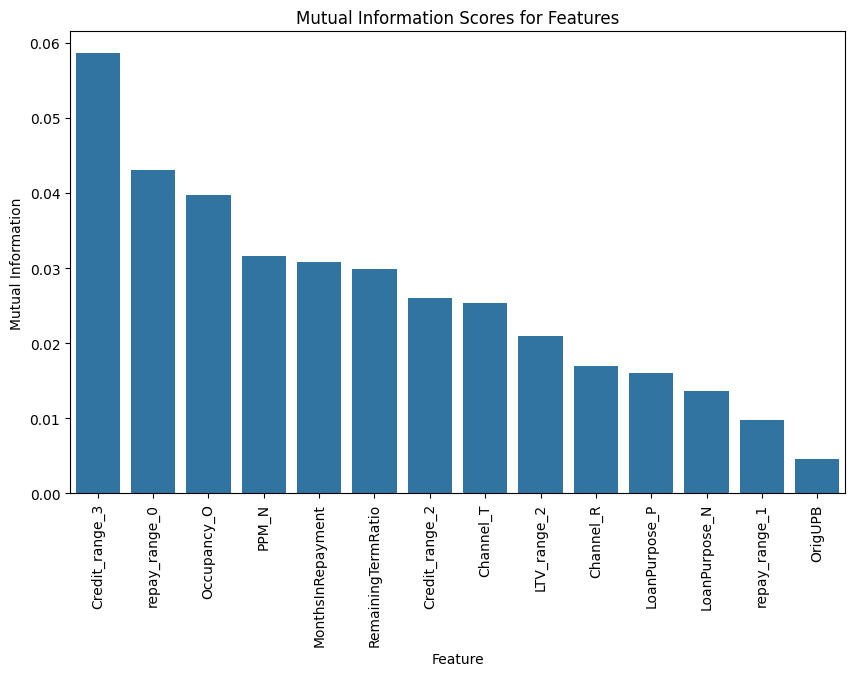

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming mi_df is your DataFrame with mutual information scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Mutual Information', data=mi_df)
plt.xticks(rotation=90)
plt.title('Mutual Information Scores for Features')
plt.show()

In [ ]:
# Define a threshold for selecting features (you can adjust this threshold as needed)
threshold = 0.028

# Select features with mutual information scores above the threshold
selected_features = mi_df[mi_df['Mutual Information'] > threshold]['Feature'].tolist()

# Display Selected Features
print("Selected Features based on Mutual Information scores:")
print(selected_features)

# Update your DataFrame to keep only the selected features
X_selected = X[selected_features]

# Display the first few rows of the updated DataFrame
print(X_selected.head())

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Split the data into training and testing sets
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Initialize and train the Logistic Regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred_logreg = logreg.predict(X_test_selected)

# Evaluate the model
print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg)}")
print(classification_report(y_test, y_pred_logreg))

from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test_selected)

# Evaluate the model
print("Random Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(classification_report(y_test, y_pred_rf))

from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred_dt = dt.predict(X_test_selected)

# Evaluate the model
print("Decision Tree Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt)}")
print(classification_report(y_test, y_pred_dt))


Selected Features based on Mutual Information scores:
['Credit_range_3', 'repay_range_0', 'Occupancy_O', 'PPM_N', 'MonthsInRepayment', 'RemainingTermRatio']
   Credit_range_3  repay_range_0  Occupancy_O  PPM_N  MonthsInRepayment  \
0           False          False         True   True                 52   
1           False          False         True   True                144   
2           False          False         True   True                 67   
3           False           True         True   True                 35   
4           False          False         True   True                 54   

   RemainingTermRatio  
0            0.144444  
1            0.400000  
2            0.186111  
3            0.097222  
4            0.150000  
Logistic Regression Performance:
Accuracy: 0.8103984628757034
              precision    recall  f1-score   support

           0       0.82      0.98      0.89     70135
           1       0.60      0.12      0.20     17301

    accuracy          

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data into training and testing sets
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# Define the desired ratio for the minority class
desired_ratio = 0.4  # For example, 50% of the majority class size

# Initialize SMOTE with the desired sampling strategy
smote = SMOTE(sampling_strategy=desired_ratio, random_state=42)

# Fit and transform the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_selected, y_train)

# Display the shape of the original and resampled training data
print(f'Original training set shape: {X_train_selected.shape}')
print(f'Resampled training set shape: {X_train_resampled.shape}')

# Logistic Regression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_resampled, y_train_resampled)
y_pred_logreg = logreg.predict(X_test_selected)
print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg)}")
print(classification_report(y_test, y_pred_logreg))

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf.predict(X_test_selected)
print("Random Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(classification_report(y_test, y_pred_rf))

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_resampled, y_train_resampled)
y_pred_dt = dt.predict(X_test_selected)
print("Decision Tree Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt)}")
print(classification_report(y_test, y_pred_dt))


Original training set shape: (204015, 6)
Resampled training set shape: (229114, 6)
Logistic Regression Performance:
Accuracy: 0.8094720710005032
              precision    recall  f1-score   support

           0       0.83      0.96      0.89     70135
           1       0.55      0.20      0.30     17301

    accuracy                           0.81     87436
   macro avg       0.69      0.58      0.59     87436
weighted avg       0.77      0.81      0.77     87436

Random Forest Performance:
Accuracy: 0.8030559494944874
              precision    recall  f1-score   support

           0       0.84      0.93      0.88     70135
           1       0.50      0.28      0.36     17301

    accuracy                           0.80     87436
   macro avg       0.67      0.60      0.62     87436
weighted avg       0.77      0.80      0.78     87436

Decision Tree Performance:
Accuracy: 0.8039823413696875
              precision    recall  f1-score   support

           0       0.84      0.94 

In [ ]:
'''
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Assuming `new_df` contains the final DataFrame with selected features
# You can update this to the actual DataFrame name if it's different

# Define features and target
X = df[['MonthsInRepayment','RemainingTermRatio','OrigInterestRate_Rounded','Credit_range']]
y = df['default']

# Encode categorical features if necessary (assuming all features are already numerical)
# If there are any categorical features, apply pd.get_dummies as needed

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the class distribution before resampling
print(f'Original class distribution:\n{y_train.value_counts()}')

# Define the desired ratio for the minority class (1)
desired_ratio = 0.8

# Calculate the required sampling strategy
minority_class_size = int(len(y_train) * desired_ratio / (1 - desired_ratio))

# Apply SMOTE to achieve the desired ratio
smote = SMOTE(sampling_strategy={1: minority_class_size}, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the class distribution after resampling
print(f'Resampled class distribution:\n{pd.Series(y_train_smote).value_counts()}')

# Verify the shape of the resampled dataset
print(f'Resampled dataset shape: {X_train_smote.shape}')
print(X_train_smote.head())
'''

Original training set shape: (204015, 3)
Resampled training set shape: (327306, 3)


In [ ]:

###spliting x data or feature

data = df

x=data[['Credit_range_3'
        ,'repay_range_0','PPM_N','MonthsInRepayment','RemainingTermRatio','Credit_range_3']].values
   # 'MonthsInRepayment','RemainingTermRatio','OrigInterestRate_Rounded','LTV_range','first_time_buyer','repay_range'
   #'RemainingTermRatio','repay_range','Credit_range','LTV_InterestRate'
x.shape   #'MonthsInRepayment','RemainingTermRatio','MonthsDelinquent','IsHighDTI','IsHighLTV'

### spliting y data or target

y=data["EverDelinquent"].values #EverDelinquent ,   resale_price
y.shape

### spliting x test and y test

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, log_loss


# Creating and training the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("LogisticRegression Accuracy:", accuracy)



# Generate the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

LogisticRegression Accuracy: 0.810432773685896
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.98      0.89     70135
           1       0.61      0.12      0.20     17301

    accuracy                           0.81     87436
   macro avg       0.71      0.55      0.55     87436
weighted avg       0.78      0.81      0.76     87436



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report
from sklearn.model_selection import train_test_split

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=32)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("RandomForestClassifier Accuracy:", accuracy)


# Detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


RandomForestClassifier Accuracy: 0.8103298412553182
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.98      0.89     70135
           1       0.59      0.14      0.22     17301

    accuracy                           0.81     87436
   macro avg       0.70      0.56      0.56     87436
weighted avg       0.78      0.81      0.76     87436



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Initialize and train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.98      0.89     70135
           1       0.52      0.10      0.17     17301

    accuracy                           0.80     87436
   macro avg       0.67      0.54      0.53     87436
weighted avg       0.76      0.80      0.75     87436



In [ ]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 6.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report

# Initialize and train XGBoost model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.98      0.89     70135
           1       0.59      0.13      0.22     17301

    accuracy                           0.81     87436
   macro avg       0.71      0.56      0.56     87436
weighted avg       0.78      0.81      0.76     87436



In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=32)

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy of Decision Tree:", accuracy_dt)

# Detailed classification report
print("Classification Report of Decision Tree:\n", classification_report(y_test, y_pred_dt))


Accuracy of Decision Tree: 0.809918111533007
Classification Report of Decision Tree:
               precision    recall  f1-score   support

           0       0.82      0.98      0.89     70135
           1       0.59      0.13      0.22     17301

    accuracy                           0.81     87436
   macro avg       0.70      0.56      0.56     87436
weighted avg       0.77      0.81      0.76     87436

